<a href="https://colab.research.google.com/github/kasidejcha/titanic_ML/blob/main/Titanic_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
#!pip install catboost

In [197]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
from  scipy.stats import skew, kurtosis, shapiro
from statistics import mean
from math import sqrt
from matplotlib.pyplot import figure
import time, datetime
import matplotlib.pyplot as plt

from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [145]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Overall Explore

In [146]:
train = pd.read_csv('/content/drive/My Drive/personal_project/titanic/train.csv')
test = pd.read_csv('/content/drive/My Drive/personal_project/titanic/test.csv')
gen_sub = pd.read_csv('/content/drive/My Drive/personal_project/titanic/gender_submission.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [148]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [149]:
train.shape

(891, 12)

In [150]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Exploration Data Analysis(EDA)

Feature Exploration

**Survived**

0 = did not survive

1 = survived






0    549
1    342
Name: Survived, dtype: int64


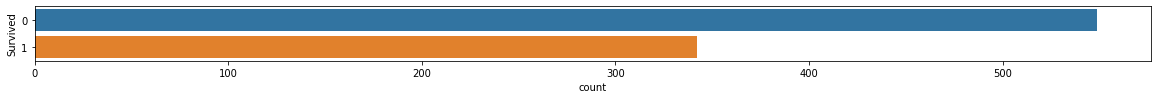

In [151]:
# How many people survived?
fig = plt.figure(figsize=(20,1))
sns.countplot(data=train, y='Survived');
print(train.Survived.value_counts())

**Pclass**

Ticket class

1 = 1st, 2 = 2nd, 3 = 3rd



3    491
1    216
2    184
Name: Pclass, dtype: int64


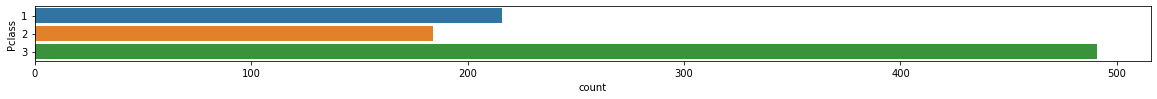

In [152]:
fig = plt.figure(figsize=(20,1))
sns.countplot(data=train, y='Pclass');
print(train.Pclass.value_counts())

**Name**

In [153]:
train.Name.value_counts()

Backstrom, Mr. Karl Alfred                             1
Farrell, Mr. James                                     1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Hagland, Mr. Konrad Mathias Reiersen                   1
Edvardsson, Mr. Gustaf Hjalmar                         1
                                                      ..
Coutts, Master. Eden Leslie "Neville"                  1
Knight, Mr. Robert J                                   1
de Pelsmaeker, Mr. Alfons                              1
Jonkoff, Mr. Lalio                                     1
Andersson, Mr. Anders Johan                            1
Name: Name, Length: 891, dtype: int64

**Sex**

male      577
female    314
Name: Sex, dtype: int64


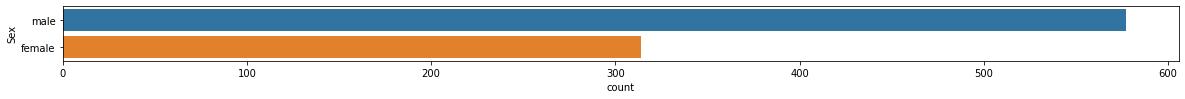

In [154]:
fig = plt.figure(figsize=(20,1))
sns.countplot(data=train, y='Sex');
print(train.Sex.value_counts())

        survived  die
male         342  549
female       233  658


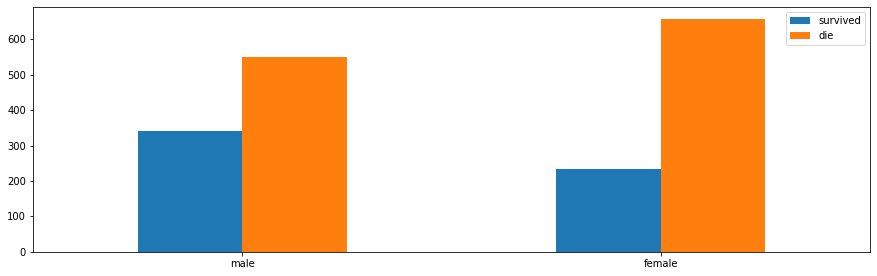

In [155]:
# male survived
m_sur = train[train.Sex.str.contains('male') & train.Survived==1]
# male did not survive
m_die = train[train.Sex.str.contains('male') & train.Survived==0]
# female survived
fm_sur = train[train.Sex.str.contains('female') & train.Survived==1]
# female did not survive
fm_die = train[train.Sex.str.contains('female') & train.Survived==0]

surdie = {'survived': [len(m_sur),len(fm_sur)], 'die': [len(m_die),len(fm_die)]}
sex_surdie = pd.DataFrame(surdie,index=['male','female'])
print(sex_surdie)
axes = sex_surdie.plot.bar(rot=0)

**Age**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


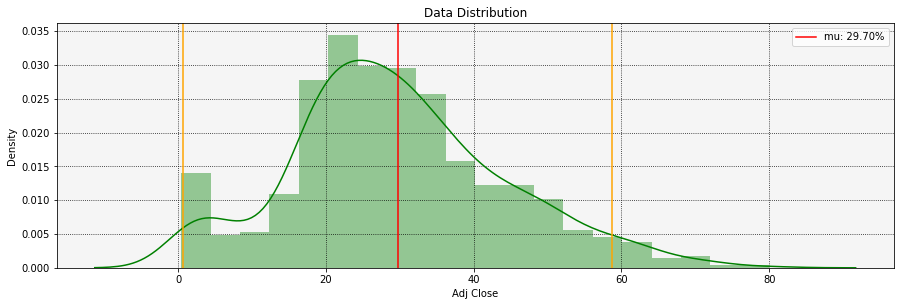

Age mode:  24.0


In [156]:
# Plot Age Distribution

plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize'] = (15.0, 4.5) # set the size of figure
plt.subplot(facecolor = "whitesmoke") # set the background color

sns.distplot(train['Age'],color='g')

plt.title("Data Distribution")
plt.xlabel("Adj Close")

mean = np.mean(train['Age'])
std = np.std(train['Age'])
plt.axvline(x=mean, color='r', linestyle='-', label="mu: {0:.2f}%".format(mean))
plt.axvline(x=mean+2*std, color='orange', linestyle='-')
plt.axvline(x=mean-2*std, color='orange', linestyle='-')
plt.grid(color="k", linestyle=":") # set grid and line shape
plt.legend()
plt.show()
print('Age mode: ', train['Age'].mode()[0])

**SibSp**

number of siblings / spouses aboard the Titanic



0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


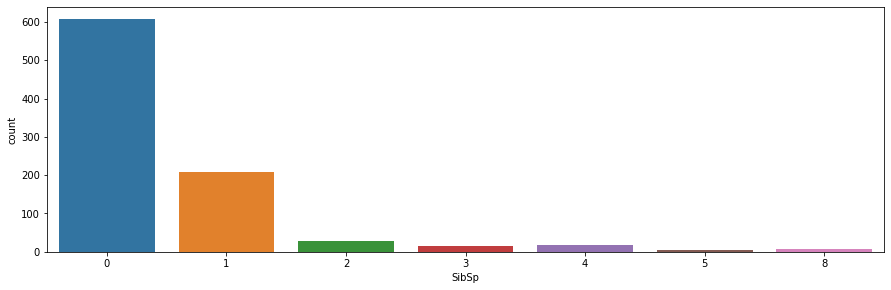

In [157]:
print(train.SibSp.value_counts())

sns.countplot(train['SibSp'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


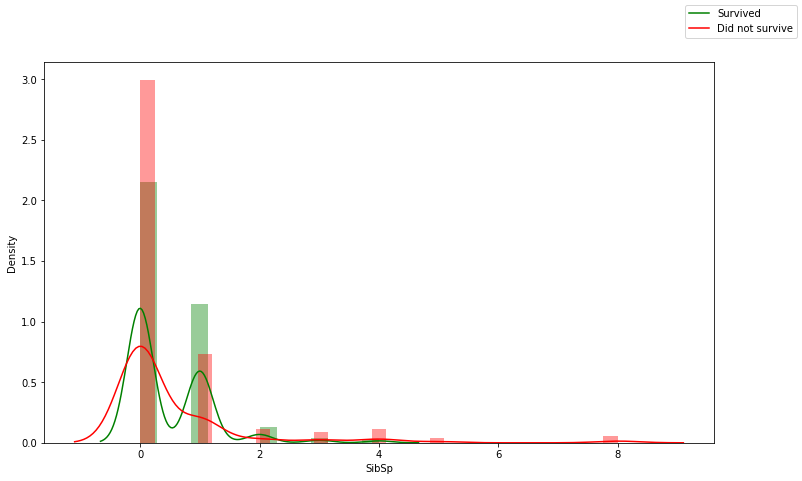

In [158]:
fig = plt.figure(figsize=(12, 7))
sns.distplot(train.loc[train['Survived'] == 1]['SibSp'], 
              kde_kws={"label": "Survived"}, color='g');
sns.distplot(train.loc[train['Survived'] == 0]['SibSp'], 
              kde_kws={"label": "Did not survive"}, color='r');
fig.legend(labels=['Survived','Did not survive'])

**Parch**

number of parents / children aboard the Titanic

In [159]:
print(train.Parch.value_counts())

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


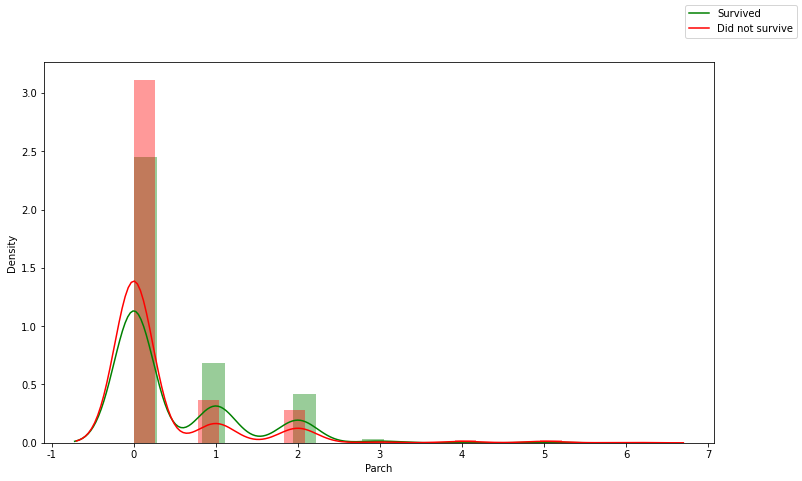

In [160]:
fig = plt.figure(figsize=(12, 7))
sns.distplot(train.loc[train['Survived'] == 1]['Parch'], 
              kde_kws={"label": "Survived"}, color='g');
sns.distplot(train.loc[train['Survived'] == 0]['Parch'], 
              kde_kws={"label": "Did not survive"}, color='r');
fig.legend(labels=['Survived','Did not survive'])

**Ticket**

In [161]:
train.Ticket.value_counts()

CA. 2343      7
1601          7
347082        7
347088        6
3101295       6
             ..
345767        1
29751         1
C.A. 24580    1
11813         1
350407        1
Name: Ticket, Length: 681, dtype: int64

**Fare**

In [162]:
train.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


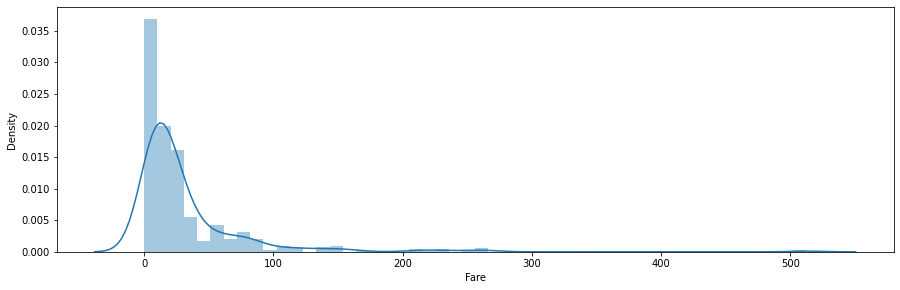

In [163]:
sns.distplot(train.Fare)

**Cabin**

In [164]:
print(train.Cabin.value_counts())
print('')
print('Number of NaN: ',train.Cabin.isnull().sum())

B96 B98        4
G6             4
C23 C25 C27    4
F33            3
C22 C26        3
              ..
C106           1
B94            1
D49            1
C82            1
D10 D12        1
Name: Cabin, Length: 147, dtype: int64

Number of NaN:  687


**Embarked**

In [165]:
print(train['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


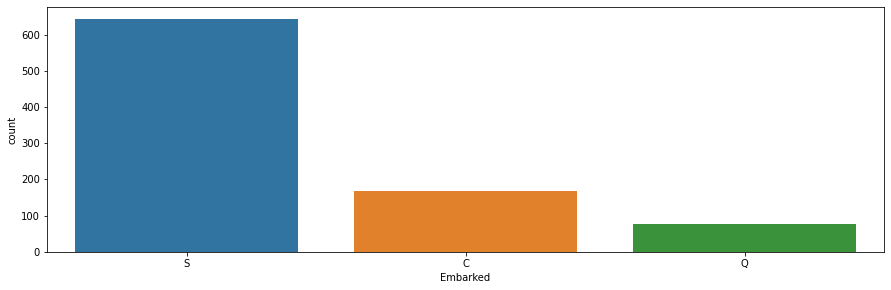

In [166]:
sns.countplot(train['Embarked'])

   survived  die
S       217  674
C        93  798
Q        30  861


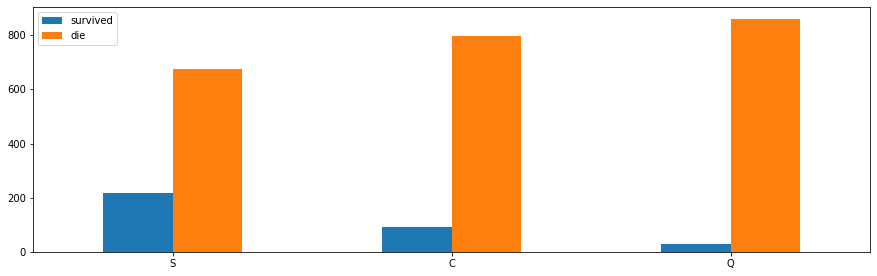

In [167]:
s_sur = train[train.Embarked.str.contains('S') & train.Survived==1]
s_die = train[train.Embarked.str.contains('S') & train.Survived==0]

c_sur = train[train.Embarked.str.contains('C') & train.Survived==1]
c_die = train[train.Embarked.str.contains('C') & train.Survived==0]

q_sur = train[train.Embarked.str.contains('Q') & train.Survived==1]
q_die = train[train.Embarked.str.contains('Q') & train.Survived==0]

surdie = {'survived': [len(s_sur),len(c_sur),len(q_sur)], 'die': [len(s_die),len(c_die),len(q_die)]}
embarked_surdie = pd.DataFrame(surdie,index=['S','C','Q'])
print(embarked_surdie)
axes = embarked_surdie.plot.bar(rot=0)

# Data Preprocessing

**Initial Cleaning**

In [168]:
# drop Name
train = train.drop(['Name'], axis=1)
# drop Ticket
train = train.drop(['Ticket'], axis=1)
# drop Cabin
train = train.drop(['Cabin'], axis=1)
# drop Age
#train = train.drop(['Age'], axis=1) # age contains alot of NaN. If they were to be replaced, this could lead to misleading information

# Replace NaN in Age column with Mode value
train['Age'] = train['Age'].fillna(train['Age'].mode()[0])
# Replace NaN in Embarked column with highest count Embarked
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].value_counts().index[0])

In [169]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


**Continuous Input**

In [170]:
# one hot encoding
# Some algorithms can work with categorical data directly. Ex. Decision tree
# Many ML algorithms cannot operate on label data directly. They required all input variables and output variables to be numeric
sex_onehot = pd.get_dummies(train.Sex, prefix='Sex')
embarked_onehot = pd.get_dummies(train.Embarked, prefix='Embarked')

train_con = pd.concat([train,sex_onehot,embarked_onehot], axis=1)
train_con = train_con.drop(['Sex','Embarked'],axis=1)
train_con.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


**Discrete Data**

In [171]:
# Assign Age to categories (discretized) because Age is type float
bin_age = [0, 20, 40, 60, 80, 100]
dis_age = pd.cut(train['Age'], bins=bin_age) # discretised
dis_age.value_counts()

(20, 40]     562
(0, 20]      179
(40, 60]     128
(60, 80]      22
(80, 100]      0
Name: Age, dtype: int64

In [172]:
# Assign Fare to categories (discretized) because Fare is type float
bin_fare = [-1, 100, 200, 300, 400, 500]
dis_fare = pd.cut(train['Fare'], bins=bin_fare) # discretised
dis_fare.value_counts()

(-1, 100]     838
(100, 200]     33
(200, 300]     17
(400, 500]      0
(300, 400]      0
Name: Fare, dtype: int64

In [173]:
train_d = train.copy()
train_d['Fare'] = dis_fare
train_d['Age'] = dis_age
train_d.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,"(20, 40]",1,0,"(-1, 100]",S
1,2,1,1,female,"(20, 40]",1,0,"(-1, 100]",C
2,3,1,3,female,"(20, 40]",0,0,"(-1, 100]",S
3,4,1,1,female,"(20, 40]",1,0,"(-1, 100]",S
4,5,0,3,male,"(20, 40]",0,0,"(-1, 100]",S


In [174]:
# one hot encoding
# Some algorithms can work with categorical data directly. Ex. Decision tree
# Many ML algorithms cannot operate on label data directly. They required all input variables and output variables to be numeric
sex_onehot = pd.get_dummies(train_d.Sex, prefix='Sex')
embarked_onehot = pd.get_dummies(train_d.Embarked, prefix='Embarked')
fare_onehot = pd.get_dummies(train_d.Fare, prefix='Fare')
age_onehot = pd.get_dummies(train_d.Age, prefix='Age')

train_dis = pd.concat([train_d,sex_onehot,embarked_onehot,age_onehot,fare_onehot], axis=1)
train_dis = train_dis.drop(['Sex','Embarked','Fare','Age'],axis=1)
train_dis.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,"Age_(0, 20]","Age_(20, 40]","Age_(40, 60]","Age_(60, 80]","Age_(80, 100]","Fare_(-1, 100]","Fare_(100, 200]","Fare_(200, 300]","Fare_(300, 400]","Fare_(400, 500]"
0,1,0,3,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0
1,2,1,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0
2,3,1,3,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0
3,4,1,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0
4,5,0,3,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0


# Split x_train & y_train

In [175]:
# Select continuous data or discrete data
df = train_dis

In [176]:
x_train = df.drop(['Survived','PassengerId'],axis=1)
y_train = df['Survived']

In [177]:
x_train.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,"Age_(0, 20]","Age_(20, 40]","Age_(40, 60]","Age_(60, 80]","Age_(80, 100]","Fare_(-1, 100]","Fare_(100, 200]","Fare_(200, 300]","Fare_(300, 400]","Fare_(400, 500]"
0,3,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0
1,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0
2,3,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0
3,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0
4,3,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0


In [178]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Model Fitting

**K nearest neighbours(KNN)**

In [179]:
start_time = time.time()

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25), 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']} # create a dictionary of all values of n_neighbors

# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=10, verbose=0)# 10-fold cv
knn_gscv.fit(x_train, y_train) # fit model to data
print('Accuracy: ', knn_gscv.best_score_) # best_score_ outputs the mean accuracy of the scores obtained through cross-validation
print('Best estimator: ', knn_gscv.best_estimator_)
log_time = (time.time() - start_time)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

knn_acc = knn_gscv.best_score_
knn_model_best = knn_gscv.best_estimator_

Accuracy:  0.8069787765293382
Best estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')
Running Time: 0:00:07.345280


**Logistic Regression**

In [180]:
start_time = time.time()

model = LogisticRegression()
param_grid = {} # create a dictionary of all values of n_neighbors

# use gridsearch to test all values for n_neighbors
model_gscv = GridSearchCV(model, param_grid, cv=10, verbose=0)# 10-fold cv
model_gscv.fit(x_train, y_train) # fit model to data
print('Accuracy: ', model_gscv.best_score_)
print('Best estimator: ', model_gscv.best_estimator_)
log_time = (time.time() - start_time)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

logistic_acc = model_gscv.best_score_
logistic_model_best = model_gscv.best_estimator_

Accuracy:  0.7946441947565545
Best estimator:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Running Time: 0:00:00.240372


**Decision Tree**

In [181]:
start_time = time.time()

model = DecisionTreeClassifier(random_state=42)

criterion = ['gini', 'entropy']
depths = np.arange(1, 21)
splitter = ['best', 'random']
param_grid = [{'max_depth':depths,
              'criterion':criterion, 'max_features': ['auto', 'sqrt', 'log2']}] # create a dictionary of all values of n_neighbors

# use gridsearch to test all values for n_neighbors
model_gscv = GridSearchCV(model, param_grid, cv=10, verbose=0)# 10-fold cv
model_gscv.fit(x_train, y_train) # fit model to data
print('Accuracy: ', model_gscv.best_score_)
print('Best estimator: ', model_gscv.best_estimator_)
log_time = (time.time() - start_time)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

decisiontree_acc = model_gscv.best_score_
decisiontree_model_best = model_gscv.best_estimator_

Accuracy:  0.8137203495630461
Best estimator:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
Running Time: 0:00:03.741051


**Random Forest**

In [182]:
start_time = time.time()
model = RandomForestClassifier(random_state=42)

param_grid = {'n_estimators': [200, 400, 500],
              'max_features': ['auto'],
              'max_depth' : [4,5,6,7,8],
              'criterion' :['gini', 'entropy']} # create a dictionary of all values of n_neighbors

# use gridsearch to test all values for n_neighbors
model_gscv = GridSearchCV(model, param_grid, cv=10, verbose=0)# 10-fold cv
model_gscv.fit(x_train, y_train) # fit model to data
print('Accuracy: ', model_gscv.best_score_)
print('Best estimator: ', model_gscv.best_estimator_)
log_time = (time.time() - start_time)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

randomforest_acc = model_gscv.best_score_
randomforest_model_best = model_gscv.best_estimator_

Accuracy:  0.8148439450686642
Best estimator:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Running Time: 0:02:27.621814


**Gradient Boost Trees**

In [183]:
start_time = time.time()
model = GradientBoostingClassifier(random_state=42)

param_grid = {"loss":["deviance"],
              "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
              "max_depth":[3,5,8],
              "max_features":["log2","sqrt","auto"],
              "criterion": ["friedman_mse",  "mae"],
              "n_estimators":[10]} # create a dictionary of all values of n_neighbors

# use gridsearch to test all values for n_neighbors
model_gscv = GridSearchCV(model, param_grid, cv=10, verbose=0)# 10-fold cv
model_gscv.fit(x_train, y_train) # fit model to data
print('Accuracy: ', model_gscv.best_score_)
print('Best estimator: ', model_gscv.best_estimator_)
log_time = (time.time() - start_time)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

gradientboost_acc = model_gscv.best_score_
gradientboost_model_best = model_gscv.best_estimator_

Accuracy:  0.8182272159800249
Best estimator:  GradientBoostingClassifier(ccp_alpha=0.0, criterion='mae', init=None,
                           learning_rate=0.075, loss='deviance', max_depth=8,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Running Time: 0:01:09.800515


**CatBoost**

In [184]:
start_time = time.time()

train_pool = Pool(x_train, y_train)

# define the model
model = CatBoostClassifier(iterations=1000, 
                           task_type="GPU",
                           devices='0:1',
                           custom_loss=['Accuracy'],
                           loss_function='Logloss')
# fit the model
model.fit(train_pool,verbose=False)

log_time = (time.time() - start_time)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Running Time: 0:00:17.766984


In [185]:
start_time = time.time()

cv_params = model.get_params()
cv_data = cv(train_pool,
             cv_params,
             fold_count=10, verbose=False)

log_time = (time.time() - start_time)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Running Time: 0:20:25.525063


In [186]:
print('Accuracy: ', cv_data['test-Accuracy-mean'].max())
catboost_acc = cv_data['test-Accuracy-mean'].max()
catboost_model_best = model
print(catboost_model_best.get_params())

Accuracy:  0.8137787992282377
{'iterations': 1000, 'loss_function': 'Logloss', 'custom_loss': ['Accuracy'], 'task_type': 'GPU', 'devices': '0:1'}


# Best Model

In [187]:
compare = pd.DataFrame({'Results_acc': [knn_acc, logistic_acc, decisiontree_acc, 
                                        randomforest_acc, gradientboost_acc, catboost_acc],
                        'Model': ['KNN', 'LOG','DT', 'RF', 'GB','CB']}).set_index('Model')
print(compare.sort_values(by = 'Results_acc', ascending=False))

       Results_acc
Model             
GB        0.818227
RF        0.814844
CB        0.813779
DT        0.813720
KNN       0.806979
LOG       0.794644


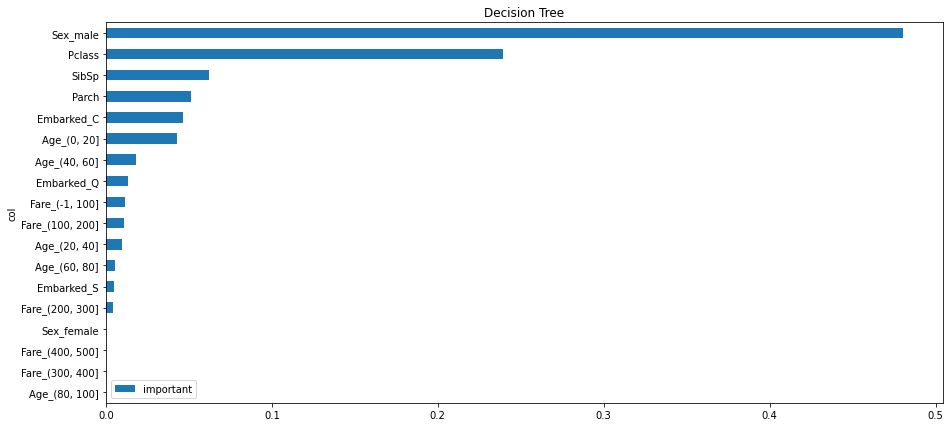

In [188]:
fea_imp = pd.DataFrame({'important': decisiontree_model_best.feature_importances_, 'col': x_train.columns})
fea_imp = fea_imp.sort_values(['important', 'col'], ascending=[True, True])
_ = fea_imp.plot(kind='barh', x='col', y='important', figsize=(15,7),title='Decision Tree')

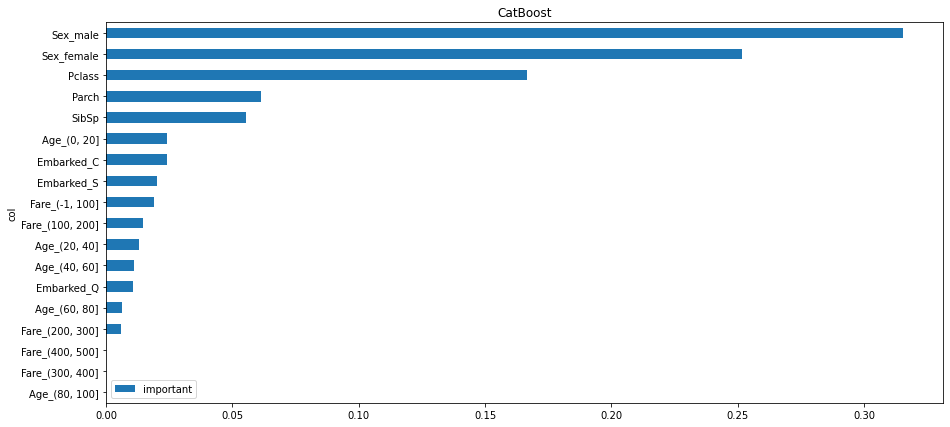

In [222]:
fea_imp = pd.DataFrame({'important': randomforest_model_best.feature_importances_, 'col': x_train.columns})
fea_imp = fea_imp.sort_values(['important', 'col'], ascending=[True, True])
_ = fea_imp.plot(kind='barh', x='col', y='important', figsize=(15,7), title='CatBoost')

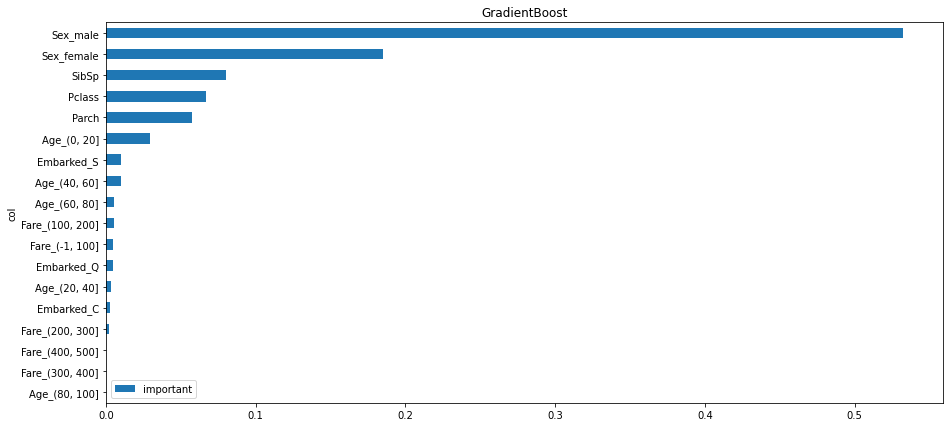

In [189]:
fea_imp = pd.DataFrame({'important': gradientboost_model_best.feature_importances_, 'col': x_train.columns})
fea_imp = fea_imp.sort_values(['important', 'col'], ascending=[True, True])
_ = fea_imp.plot(kind='barh', x='col', y='important', figsize=(15,7), title='GradientBoost')

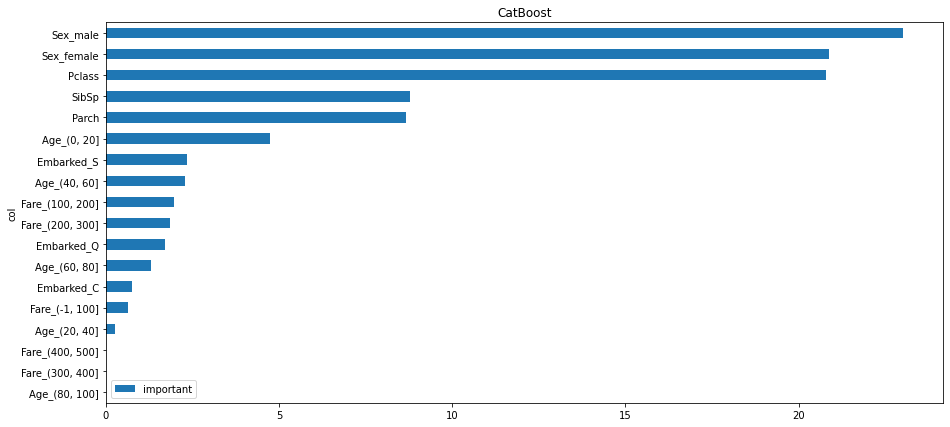

In [190]:
fea_imp = pd.DataFrame({'important': catboost_model_best.feature_importances_, 'col': x_train.columns})
fea_imp = fea_imp.sort_values(['important', 'col'], ascending=[True, True])
_ = fea_imp.plot(kind='barh', x='col', y='important', figsize=(15,7), title='CatBoost')

Featrue importance shows how much each feature contributed to the model.

We could take this information and remove features which don't contribute much to reduce dimenstionality (and save compute).

Or we could improve features which offer more to the model. In this case, there aren't many ways you could improve sex as it's already a binary.

Feature importance figures also show what features of their data are most important when it comes to making predictions with machine learning models.

In [191]:
eval = catboost_model_best.eval_metrics(train_pool,metrics = ['Precision', 'Recall', 'F1', 'AUC'])

metrics = ['Precision', 'Recall', 'F1', 'AUC']
for metric in metrics:
  print(metric+': {}'.format(np.max(eval[metric])))

Precision: 0.9113300492610837
Recall: 0.7397660818713451
F1: 0.7881619937694704
AUC: 0.9004836012313723


In [219]:
joblib.dump(catboost_model_best, '/content/drive/My Drive/personal_project/titanic/model/catboost.pkl') # Save Model

['/content/drive/My Drive/personal_project/titanic/catboost.pkl']

# Preprocessing on Test Set

In [231]:
test = pd.read_csv('/content/drive/My Drive/personal_project/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [239]:
test = test[train.drop(['Survived'],axis=1).columns]
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


**Test Continuous**

In [240]:
sex_onehot = pd.get_dummies(test.Sex, prefix='Sex')
embarked_onehot = pd.get_dummies(test.Embarked, prefix='Embarked')

test_con = pd.concat([test,sex_onehot,embarked_onehot], axis=1)
test_con = test_con.drop(['Sex','Embarked','PassengerId'],axis=1)
test_con.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


**Test Discrete**

In [203]:
bin_age = [0, 20, 40, 60, 80, 100]
dis_age = pd.cut(train['Age'], bins=bin_age) # discretised
print(dis_age.value_counts())
bin_fare = [-1, 100, 200, 300, 400, 500]
dis_fare = pd.cut(train['Fare'], bins=bin_fare) # discretised
print('')
print(dis_fare.value_counts())
test_d = test.copy()
test_d['Fare'] = dis_fare
test_d['Age'] = dis_age

(20, 40]     562
(0, 20]      179
(40, 60]     128
(60, 80]      22
(80, 100]      0
Name: Age, dtype: int64

(-1, 100]     838
(100, 200]     33
(200, 300]     17
(400, 500]      0
(300, 400]      0
Name: Fare, dtype: int64


In [204]:
sex_onehot = pd.get_dummies(test_d.Sex, prefix='Sex')
embarked_onehot = pd.get_dummies(test_d.Embarked, prefix='Embarked')
fare_onehot = pd.get_dummies(test_d.Fare, prefix='Fare')
age_onehot = pd.get_dummies(test_d.Age, prefix='Age')

test_dis = pd.concat([test_d,sex_onehot,embarked_onehot,age_onehot,fare_onehot], axis=1)
test_dis = test_dis.drop(['Sex','Embarked','Fare','Age','PassengerId'],axis=1)
test_dis.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,"Age_(0, 20]","Age_(20, 40]","Age_(40, 60]","Age_(60, 80]","Age_(80, 100]","Fare_(-1, 100]","Fare_(100, 200]","Fare_(200, 300]","Fare_(300, 400]","Fare_(400, 500]"
0,3,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0
1,3,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0
2,2,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0
3,3,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0
4,3,1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0


# Predictions

In [232]:
catboost_model = joblib.load('/content/drive/My Drive/personal_project/titanic/model/catboost.pkl') # Load Model

predictions = catboost_model_best.predict(test_dis) # test_dis or test_con
# print(predictions)
# print('')
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions.astype(int) # our model predictions on the test dataset
print(submission)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


In [230]:
submission.to_csv('/content/drive/My Drive/personal_project/titanic/final_submission/submission_cat.csv', 
                  index = False) # save predictions